## Assignment for Week 6 - K-Means and Hierarchical Clustering

### Exerise:
#### KMeans and Hierarchial Clustering

Collect data from twitter using your choice of hashtag (at least 1000 tweets). 
To gather your Twitter data, I would recommend using the python library tweepy.<br>
Feel free to adopt the code from : https://www.geeksforgeeks.org/extracting-tweets-containing-a-particular-hashtag-using-python/
Note: Reddit data can be used instead of Twitter data for this assignment.

- You will use both K-Means and HCA to cluster the collected data
- Draw a dendrogram
- Identify number of optimum clusters, and justify how do you pick number of clusters
- List the top 10 most frequent words
- Visualize using wordclouds
- Summarize your findings

### Deliverables:

Upload your notebook's .ipynb file and pdf printouts.
   
**Important:** Make sure your provide complete and thorough explanations for all of your analysis. You need to defend your thought processes and reasoning.

In [1]:
import tweepy

In [2]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as shc

import warnings
warnings.filterwarnings("ignore")

Using recommended tweepy code from: https://www.geeksforgeeks.org/extracting-tweets-containing-a-particular-hashtag-using-python/

Pulling tweets with hashtag "omicron" to see what activity is circulating twitter regarding the latest covid variant:

In [3]:
# function to display data of each tweet
def printtweetdata(n, ith_tweet):
    print()
    print(f"Tweet {n}:")
    print(f"Username:{ith_tweet[0]}")
    print(f"Description:{ith_tweet[1]}")
    print(f"Location:{ith_tweet[2]}")
    print(f"Following Count:{ith_tweet[3]}")
    print(f"Follower Count:{ith_tweet[4]}")
    print(f"Total Tweets:{ith_tweet[5]}")
    print(f"Retweet Count:{ith_tweet[6]}")
    print(f"Tweet Text:{ith_tweet[7]}")
    print(f"Hashtags Used:{ith_tweet[8]}")
  
  
# function to perform data extraction
def scrape(words, date_until, numtweet):
      
    # Creating DataFrame using pandas
    db = pd.DataFrame(columns=['username', 'description', 'location', 'following',
                               'followers', 'totaltweets', 'retweetcount', 'text', 'hashtags'])
      
    # We are using .Cursor() to search through twitter for the required tweets.
    # The number of tweets can be restricted using .items(number of tweets)
    tweets = tweepy.Cursor(api.search_tweets, q=words, lang="en",
                           until=date_until, tweet_mode='extended').items(numtweet)
     
    # .Cursor() returns an iterable object. Each item in 
    # the iterator has various attributes that you can access to 
    # get information about each tweet
    list_tweets = [tweet for tweet in tweets]
      
    # Counter to maintain Tweet Count
    i = 1  
      
    # we will iterate over each tweet in the list for extracting information about each tweet
    for tweet in list_tweets:
        username = tweet.user.screen_name
        description = tweet.user.description
        location = tweet.user.location
        following = tweet.user.friends_count
        followers = tweet.user.followers_count
        totaltweets = tweet.user.statuses_count
        retweetcount = tweet.retweet_count
        hashtags = tweet.entities['hashtags']
          
        # Retweets can be distinguished by a retweeted_status attribute,
        # in case it is an invalid reference, except block will be executed
        try:
            text = tweet.retweeted_status.full_text
        except AttributeError:
            text = tweet.full_text
        hashtext = list()
        for j in range(0, len(hashtags)):
            hashtext.append(hashtags[j]['text'])
          
        # Here we are appending all the extracted information in the DataFrame
        ith_tweet = [username, description, location, following,
                     followers, totaltweets, retweetcount, text, hashtext]
        db.loc[len(db)] = ith_tweet
          
        # Function call to print tweet data on screen
        printtweetdata(i, ith_tweet)
        i = i+1
    filename = 'scraped_tweets.csv'
      
    # we will save our database as a CSV file.
    db.to_csv(filename)
  
  
if __name__ == '__main__':
      
      
    # Enter your own credentials obtained 
    # from your developer account
    consumer_key = "zgLhnYeSqplf1V9Ml5QpOfgJM"
    consumer_secret = "lA6Cy8QpUcn45gMkMgrUEiLBiDBRIRV34auKTuCLrGlBvDYob3"
    
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    
    api = tweepy.API(auth)
      
       # Enter Hashtag and initial date
    print("Enter Twitter HashTag to search for")
    words = input()
    print("Enter Date until The Tweets are required in yyyy-mm--dd")
    date_until = input()
      
    # number of tweets you want to extract in one run
    numtweet = 1500
    scrape(words, date_until, numtweet)
    print('Scraping has completed!')

Enter Twitter HashTag to search for
omicron
Enter Date until The Tweets are required in yyyy-mm--dd
2021-12-01

Tweet 1:
Username:Sbh08Mae
Description:I’m an animal lover, especially dogs!Active on Twitter 2020 🌊 💙 Resister #BLM #wtpBlue #DemVoice1C
Location:United States
Following Count:16405
Follower Count:22498
Total Tweets:133788
Retweet Count:28
Tweet Text:This time around, let's do it the Biden way👍, and NOT the tRump way 👎.

#DemVoice1 #ONEV #Resister #Omicron https://t.co/wQPKzZ0to3 https://t.co/BC2zesqjgP
Hashtags Used:['DemVoice1', 'ONEV', 'Resister', 'Omicron']

Tweet 2:
Username:glamsicles
Description:🇨🇻🇸🇳 ♒️ african lesbian gyal
Location:Dmv 🦋 she/her
Following Count:196
Follower Count:130
Total Tweets:59448
Retweet Count:11157
Tweet Text:Omicron or Omarion, either way, please get vaxxed or boosted like you “Post to Be”.
Hashtags Used:[]

Tweet 3:
Username:Melinda21084105
Description:Arizona patriot.  Mother, Grandmother.
#pureblood
Location:
Following Count:149
Follower C


Tweet 41:
Username:Sjkennetticlou1
Description:Proud mother, horse rider, writer, dog walker .
Location:
Following Count:1713
Follower Count:1382
Total Tweets:7286
Retweet Count:403
Tweet Text:@PoliticsForAlI It is all crashing down!...  Ministers have failed to provide proper evidence to justify their decision to require all frontline NHS staff to get vaccinated, a Lords committee says today. https://t.co/6A8Z3MroPu
Hashtags Used:[]

Tweet 42:
Username:nesreena89
Description:
Location:
Following Count:193
Follower Count:6
Total Tweets:68
Retweet Count:21146
Tweet Text:JUST IN: Omicron COVID variant was in Europe before South African scientists detected and flagged it to the world https://t.co/p1Hh7YSRZQ
Hashtags Used:[]

Tweet 43:
Username:mrlesmoney135
Description:LOVE TO THE #SHIBA COMMUNITY!  #Shibaswap #SHIBLIFE #Shiba 
💎 💎 💎 HANDS!!!!!!!  #BUYTHEDIP
Location:
Following Count:4975
Follower Count:1086
Total Tweets:8103
Retweet Count:10
Tweet Text:Latest news updates: Brazil confir


Tweet 64:
Username:RafaelVieira212
Description:
Location:
Following Count:66
Follower Count:25
Total Tweets:827
Retweet Count:319
Tweet Text:Omicron DLC just dropped let's go https://t.co/RbqtehI1x9
Hashtags Used:[]

Tweet 65:
Username:niknik19163049
Description:Older now, updates and still active valuing others in the pursuit of truth. tweeting in faith that my old account will open again.why keep censuring old bat?
Location:Western Australia, Australia
Following Count:372
Follower Count:130
Total Tweets:12930
Retweet Count:358
Tweet Text:🚨GOOD NEWS ALERT🚨

To brighten your Tuesday amid the Omicron gloom.. exclusive new footage of a baby beaver’s first slippery steps of freedom⛸🦫. 

This wee kit was going to be shot.. but new changes in Scotland mean campaigners were able to step in and find it a new home. https://t.co/vI7zh0GDBj
Hashtags Used:[]

Tweet 66:
Username:_afkh_
Description:brain surgeon // 🤲🏼💭 #freepalestine
Location:
Following Count:572
Follower Count:676
Total Tweets:18

Tweet 85:
Username:Katenotspecial
Description:Eco over ego;  radical feminism; veganism; rewilding; rejoining the EU. Lesbian not ‘queer’.
Location:Scotland
Following Count:1896
Follower Count:1537
Total Tweets:15753
Retweet Count:358
Tweet Text:🚨GOOD NEWS ALERT🚨

To brighten your Tuesday amid the Omicron gloom.. exclusive new footage of a baby beaver’s first slippery steps of freedom⛸🦫. 

This wee kit was going to be shot.. but new changes in Scotland mean campaigners were able to step in and find it a new home. https://t.co/vI7zh0GDBj
Hashtags Used:[]

Tweet 86:
Username:msvivianev
Description:Uma travesti, uma mulher trans em rexistência transfeminista interseccional, pesquisadora do grupo Cultura e Sexualidade (CuS).
Location:Salvador, Brazil
Following Count:722
Follower Count:460
Total Tweets:3529
Retweet Count:17030
Tweet Text:countries banned because of the omicron variant
vs. 
countries with confirmed omicron cases https://t.co/7HAxx03KfE
Hashtags Used:[]

Tweet 87:
Username:Da


Tweet 107:
Username:Patrici26077567
Description:Arty, glass half full type!
Location:
Following Count:1044
Follower Count:1062
Total Tweets:85016
Retweet Count:69
Tweet Text:Is #Omicron an Omicon? UK Government FAILS to introduce legislation to reinstate #Masks and gets #MSM to pretend its done so https://t.co/LCuScfdv11
Hashtags Used:['Omicron', 'Masks', 'MSM']

Tweet 108:
Username:caroline_pers
Description:
Location:
Following Count:97
Follower Count:235
Total Tweets:56753
Retweet Count:159
Tweet Text:2) Dutch authorities on Tuesday that they found the new Omicron variant of the coronavirus in cases dating back as long as 11 days, indicating that it was already spreading in western Europe before the first cases were identified in southern Africa.
Hashtags Used:[]

Tweet 109:
Username:AyeCal_
Description:Graduate of the University of Maryland Eastern Shore #NUPE Caption Any Photo 📸 !TM
Location:
Following Count:951
Follower Count:970
Total Tweets:39947
Retweet Count:11157
Tweet Text:


Tweet 128:
Username:Stoneglo1
Description:Ph.D. Theater, Art. Higher Ed. Ed Tech. Former union steward. Mostly retweet knowledgeable journalists, scientists, legal experts and humor.
Location:Here and there
Following Count:567
Follower Count:818
Total Tweets:194989
Retweet Count:42
Tweet Text:The news of the new #COVID19 variant, #Omicron, is really upsetting. There has already been so much pain and suffering caused by the #Coronavirus, and now it might be that the protections we have in place will be less than adequate to protect us. https://t.co/W509dOWmem
Hashtags Used:['COVID19', 'Omicron']

Tweet 129:
Username:naruruchan
Description:‏‏‏‏‏Freelance artist. 英語と日本語が分かります！
اتكلم باللهجة عراقية و افهم معظم اللهجات الخليج. Public account.
Art Twitter account: DM me :)
I'm very stupid 🌹
Location:*points on the map*
Following Count:634
Follower Count:307
Total Tweets:24412
Retweet Count:21146
Tweet Text:JUST IN: Omicron COVID variant was in Europe before South African scientists detected

Tweet 148:
Username:MutasRonald
Description:
Location:
Following Count:41
Follower Count:3
Total Tweets:1868
Retweet Count:1611
Tweet Text:NEWS UPDATE: WHO Representative to the Philippines Dr Rabindra Abeyasinghe says there's no need for PH to make face shields mandatory again. This, after PH gov't has floated the idea of reintroducing face shields amid the threat of Omicron. | via @bnzmagsambol https://t.co/JVykqnW4qb
Hashtags Used:[]

Tweet 149:
Username:CannyJenny
Description:pro choice and pro freedom! 🐝❤
Location:Manchester, England
Following Count:439
Follower Count:86
Total Tweets:1158
Retweet Count:429
Tweet Text:Oh, no wonder GPs are so keen to administer jabs! 

£30 PER JAB?

https://t.co/2XlKcgHmRd https://t.co/eLktAs87AY
Hashtags Used:[]

Tweet 150:
Username:Alskmisot
Description:Alive and kicking...
Location:
Following Count:229
Follower Count:100
Total Tweets:3196
Retweet Count:576
Tweet Text:BREAKING: Brazil confirms first cases of new omicron coronavirus variant
Hashta

Tweet 167:
Username:kipshots
Description:Concert Photography
Location:My House
Following Count:4710
Follower Count:1120
Total Tweets:47216
Retweet Count:0
Tweet Text:They Called Their Band Omicron. Now They’re Sharing the Name With a Covid Variant

“Whether for the right or wrong reasons, we’ve been getting clicks," says guitarist Li Heng Chan of the defunct Hong Kong prog-metal outfit. 

"It’s been a lot to process”
https://t.co/mQvHk9Wcq3
Hashtags Used:[]

Tweet 168:
Username:crimson_styx
Description:🎐Nerd accnt: マンガ｜商業BL｜ねんどろいど｜bjd soliloquy accnt｜unfiltered opinions｜photography enthusiast｜glutton 🍙Icon @alohasushicore
Location:💄BL accnt ➡️
Following Count:1900
Follower Count:666
Total Tweets:39437
Retweet Count:21146
Tweet Text:JUST IN: Omicron COVID variant was in Europe before South African scientists detected and flagged it to the world https://t.co/p1Hh7YSRZQ
Hashtags Used:[]

Tweet 169:
Username:ChrisCycad
Description:
Location:Pretoria, South Africa
Following Count:100
Follow

Description:Business/Politics/Tech/Music/Fashion/Beauty/Fitness/Food/Adventures/Tattoos/Cars 👸🏼💵🇨🇦🇨🇳♒️🐍💄👠🍷#teamtoryblue 💙
Location:Toronto gyal
Following Count:2859
Follower Count:617
Total Tweets:35322
Retweet Count:15
Tweet Text:NEW - Washington Post reports that U.S president Biden plans to announce Thursday that the U.S "Will require everyone entering the country to be tested one day before boarding flights, regardless of their vaccination status or country of departure." https://t.co/du8aw9lsJU
Hashtags Used:[]

Tweet 210:
Username:ZTSecure
Description:Leading the cutting-edge in Zero Trust Security and its implementation | Tweets are automated | RTs and Likes ≠ Endorsement
Location:Your Network
Following Count:2
Follower Count:110
Total Tweets:327179
Retweet Count:4
Tweet Text:Stocks, Bitcoin fall on Omicron, inflation concerns https://t.co/2zgt7xHY3E
Hashtags Used:[]

Tweet 211:
Username:getMazak
Description:The world leader in fraud prevention.
Location:This just got easier. – 


Tweet 249:
Username:RosalynSimone
Description:Instagram: @rosie__gray Snapchat:@rosietharosebud89
Location:Dallas, TX
Following Count:215
Follower Count:39
Total Tweets:4331
Retweet Count:11157
Tweet Text:Omicron or Omarion, either way, please get vaxxed or boosted like you “Post to Be”.
Hashtags Used:[]

Tweet 250:
Username:_Njxo
Description:🕊 //.
Location:uk.
Following Count:375
Follower Count:359
Total Tweets:42452
Retweet Count:1200
Tweet Text:Omicron variant pls don’t ruin my 2022 travel plans.
Hashtags Used:[]

Tweet 251:
Username:dekker_anton
Description:Doet niet mee, knoeit. Onprettig persoon. Afvallige pilaarheilige.
Location:veluwe
Following Count:3572
Follower Count:1170
Total Tweets:62255
Retweet Count:933
Tweet Text:@CBSNews So why aren’t flights from the Netherlands being stopped, given they didn’t mention they had Omicron back 11+ days ago, well before South Africa announced?
Hashtags Used:[]

Tweet 252:
Username:TrudyETruex
Description:“La libertà è come l’aria: ci si

Tweet 269:
Username:marypgkeating
Description:#Terrorism Cats and coffee. Bigot blocker, all flavours.😃
Location:ethers
Following Count:1866
Follower Count:2065
Total Tweets:293833
Retweet Count:23
Tweet Text:Roundup of reg changes from the brilliant @RenuBindra 

👉🏼 Important 👈🏼

From today, you should take a PCR test within 90 days of a previous positive PCR if you:

• develop new symptoms
• are close contact of suspected or confirmed Omicron case
• re-entering the UK from abroad https://t.co/ObvaZzBugw
Hashtags Used:[]

Tweet 270:
Username:AmandaWjustme
Description:Happy Wife & proud Mum.Fascinated by people& Medicine,(Retired GP principal).Love-kids,animals,music,food,travel.Hate-Brexit & C19.Mantra-'There must be a way'
Location:
Following Count:540
Follower Count:142
Total Tweets:2512
Retweet Count:0
Tweet Text:@ukiswitheu No Mr Javid, the misjudgement is all yours &amp; your maskless colleagues.Educate yourselves about Covid contagion &amp; proven mitigatns that suppress spread 


Tweet 313:
Username:Typ0negative
Description:Community worker/Caregiver

Child of the Analog Age

"The most revolutionary thing one can do is always to proclaim loudly what is happening." - Rosa Luxemburg
Location:Somewhere in the Salish Sea
Following Count:5001
Follower Count:768
Total Tweets:49586
Retweet Count:60
Tweet Text:If Omicron variant is already spread around the world, why has the USA only banned travel from S. Africa and the surrounding African nations?
Hashtags Used:[]

Tweet 314:
Username:missycs84
Description:(ECE Dip., MA, BEd) promoter of social justice, settler on this land. Elementary educator, supporter of quality public education. #WRDSB (She/Her)
Location:HaldimandTract (Treaty 4)(K-W)
Following Count:723
Follower Count:286
Total Tweets:16996
Retweet Count:60
Tweet Text:Hi my American friends. Your country is not reporting any Omicron variant cases? I have questions. Seriously?
Hashtags Used:[]

Tweet 315:
Username:dennis_solisa
Description:Beloved Son | Simple 


Tweet 335:
Username:gldbug
Description:Constitutionalist . VET, even a blind squirrel finds an acorn once in a while.   It is better to be feared than loved , if you cannot be both. Machiavelli
Location:USA
Following Count:4999
Follower Count:3426
Total Tweets:159916
Retweet Count:0
Tweet Text:The Nefarious Hidden Agendas Behind OMICRON! https://t.co/L3aIQXGGC5  In case you missed it...
Hashtags Used:[]

Tweet 336:
Username:cavalcante900
Description:
Location:
Following Count:694
Follower Count:164
Total Tweets:1629
Retweet Count:315
Tweet Text:A triple-vaxxed Israeli returning from London has infected another triple-vaxxed Israeli with Omicron.

So far, Omicron is a pandemic of the fully-vaccinated. We are so lucky there is a ban on travelers from Africa!

https://t.co/jinb29MLsh
Hashtags Used:[]

Tweet 337:
Username:fergal_whatever
Description:🇮🇪🇯🇵

I work for Google on Chrome. I say this so I can discuss web stuff without appearing sneaky! My opinions and Google's are quite at odds


Tweet 359:
Username:cathy39637692
Description:
Location:
Following Count:632
Follower Count:249
Total Tweets:1800
Retweet Count:422
Tweet Text:"It’s because of poor leadership". 

Pretty damning assessment of the UK's response to the Omicron variant, from one of the Government’s own scientific advisers.

📝 Exclusive interview with @AdamBienkov for @BylineTimes 

https://t.co/NvXJSObSS1
Hashtags Used:[]

Tweet 360:
Username:erinnn_te
Description:cheese enthusiast
Location:San Diego, CA
Following Count:331
Follower Count:413
Total Tweets:2907
Retweet Count:11157
Tweet Text:Omicron or Omarion, either way, please get vaxxed or boosted like you “Post to Be”.
Hashtags Used:[]

Tweet 361:
Username:Hanksy19
Description:#WeFeelThisToo #AbolishTheFilibuster #BLM #PoorPeoplesCampaign Writer/Director
Location:New York, USA
Following Count:1027
Follower Count:137
Total Tweets:9800
Retweet Count:588
Tweet Text:Intriguing—Netherlands govt says #Omicron COVID variant was in Europe before South Africa

Tweet 378:
Username:EricMoses_m
Description:sɪᴍᴘʟᴇ ʙᴜᴛ sɪɢɴɪғɪᴄᴀɴᴛ https://t.co/ztQy1yMeMm
Location:Nigeria
Following Count:2222
Follower Count:746
Total Tweets:610
Retweet Count:464
Tweet Text:Cartoon for @chronicleherald #Omicron #COVID19 https://t.co/zXazvNeXcy
Hashtags Used:['Omicron', 'COVID19']

Tweet 379:
Username:TraceyBenmore
Description:Tweets allsorts Fashion, art, current affairs etc promoting Intl artist ‘Joshua Benmore’ View Desired Destinations @wandertrix for travel inspired posts by me
Location:UK
Following Count:4553
Follower Count:1174
Total Tweets:160765
Retweet Count:158
Tweet Text:The WHO has advised that people over the age of 60 or at risk of developing serious illness due to #COVID19 should postpone international travel due to the Omicron variant
Hashtags Used:['COVID19']

Tweet 380:
Username:TimWals02423209
Description:History Business & Finance Politics Travel Science & Technology
Location:Lancashire, England. 
Following Count:4227
Follower Count:1201
Total T


Tweet 399:
Username:DavidKe52871220
Description:I don’t have children I am fighting for yours.Left or right all must come together NOW.Stop division,accept others have other opinions but don’t hate.
Location:United Kingdom
Following Count:5004
Follower Count:1928
Total Tweets:31808
Retweet Count:506
Tweet Text:Could someone explain to me how they are getting away with this ludicrous Omicron bullshit because I'm starting to question my sanity. What the fuck is happening, why can so few people see the utter ridiculousness of the narrative?
Hashtags Used:[]

Tweet 400:
Username:GoldbergDaDr
Description:Hospitalist/Assistant Clinical Professor  @VCUHealth. Proud @UVA Grad. Alzheimer’s advocate. Tweets are my own
Location:
Following Count:2704
Follower Count:609
Total Tweets:2515
Retweet Count:1
Tweet Text:While we learn more about Omicron, the new COVID-19 variant…

Here’s what you can do:
* Get boosted!
* Get vaccinated!
* Get tested, if you have symptoms or have been exposed to COVID-19


Tweet 418:
Username:Liespolitician1
Description:Middle class
Location:
Following Count:1400
Follower Count:505
Total Tweets:16895
Retweet Count:659
Tweet Text:Tune in as I provide an update on the Omicron variant. https://t.co/6hbzINU14w
Hashtags Used:[]

Tweet 419:
Username:RichardCityNews
Description:Journalist, Queen’s Park reporter, interesting stories. Tips confidential at richard.southern@rci.rogers.com On @CityNewsTO & Rogers stations coast to coast
Location:Toronto
Following Count:1449
Follower Count:16258
Total Tweets:19712
Retweet Count:15
Tweet Text:NEW - Washington Post reports that U.S president Biden plans to announce Thursday that the U.S "Will require everyone entering the country to be tested one day before boarding flights, regardless of their vaccination status or country of departure." https://t.co/du8aw9lsJU
Hashtags Used:[]

Tweet 420:
Username:JakeWSimons
Description:Denizen of Fleet Street and all-round scurrilous hack. Deputy Editor, Jewish Chronicle. Spectato

Tweet 455:
Username:Swellwell
Description:Building @HiveAdvisory @Garnetlegal 

#Techlawyer #Startups #TechPolicy #Finance #Sports #IP

Aggressively pursuing  #EndPolicebrutality
Location:garnetlawpractice.com 
Following Count:962
Follower Count:644
Total Tweets:58264
Retweet Count:3439
Tweet Text:Canada is expanding its travel ban to include Nigeria, Malawi and Egypt. (After previously imposing bans on southern African countries.)
Interestingly, there are far more confirmed cases of Omicron in European countries than in Nigeria, Malawi or Egypt. But they're not banned.
Hashtags Used:[]

Tweet 456:
Username:Pandu_23
Description:very eien ni tomaranai
Location:
Following Count:163
Follower Count:188
Total Tweets:27385
Retweet Count:743
Tweet Text:Confirmed cases of Omicron variant:
 
- Australia 
- Austria 
- Belgium 
- Botswana 
- Brazil
- Canada 
- Czech Republic 
- Denmark 
- Germany 
- Hong Kong 
- Israel 
- Italy 
- Japan
- Netherlands 
- Portugal 
- South Africa 
- Spain
- Sweden 

Tweet 474:
Username:onwebanalytics
Description:Digital #Marketing & #Strategy | #SEM #Google #Ads | #SEO | #Analytics | #Facebook & #Social Media Strategy
Location:Montreal, Quebec
Following Count:3125
Follower Count:942
Total Tweets:22349
Retweet Count:1038
Tweet Text:People vaccinated with Pfizer/BioNTech will most likely be protected from severe illness if infected with Omicron, BioNTech CEO says - WSJ
Hashtags Used:[]

Tweet 475:
Username:beebinuya
Description:Give up your dreams and die.
Location:Valenzuela City, National Capi
Following Count:165
Follower Count:118
Total Tweets:6707
Retweet Count:201
Tweet Text:World Health Organization country representative Rabindra Abeyasinghe said it will be premature to mandate the use of face shields again as the COVID-19 Omicron variant still needs to be studied. https://t.co/jxlsibsOP0 | via @onenewsph https://t.co/XrDFSJog2K
Hashtags Used:[]

Tweet 476:
Username:BerkleyBearNews
Description:Bringing the news that is important, that as quic

Tweet 511:
Username:texicangrrl
Description:TheTerakian's pinch hitter account. Radical humanist seeking oneness with nature. Martial artist, healing accomplice, curious monkey.
Location:
Following Count:1045
Follower Count:262
Total Tweets:14486
Retweet Count:2497
Tweet Text:Dear Media

Please stop repeating anecdotes that physicians have seen mild cases of Omicron

The VAST majority of COVID cases of all variants are mild. The problem is a fraction are not, and when cases pile up, the fraction adds to a lot of hospitalization, death, and long-COVID
Hashtags Used:[]

Tweet 512:
Username:optimura1
Description:R1 de Microbiología y Parasitología, frikardo en mis ratos libres.
Location:
Following Count:274
Follower Count:31
Total Tweets:582
Retweet Count:2497
Tweet Text:Dear Media

Please stop repeating anecdotes that physicians have seen mild cases of Omicron

The VAST majority of COVID cases of all variants are mild. The problem is a fraction are not, and when cases pile up, the fracti


Tweet 533:
Username:StanM9502
Description:Mi mejor amigo es Kyle Broflovski, mi papá es un imbécil, OMG, they Killed Kenny, You Bastards!!! Cartman es un culo gordo #ManUnitedCuba #TwitterCuba
Location:South Park, Colorado
Following Count:849
Follower Count:2878
Total Tweets:14853
Retweet Count:2
Tweet Text:Omicron https://t.co/GMUIA3oTnm
Hashtags Used:[]

Tweet 534:
Username:PedroKiray
Description:59 y.o.
Former photographer of male nude.
Location:Praia Grande SP BR.
Following Count:270
Follower Count:268
Total Tweets:24041
Retweet Count:10
Tweet Text:Latest news updates: Brazil confirms Latin America’s first reported cases of Omicron variant https://t.co/lDtQhRE21G
Hashtags Used:[]

Tweet 535:
Username:TheFilthyFacts
Description:They have BILLION$ into media lies. The truth doesn't have that kinda budget. Watch out! 🚫 #NewWorldOrder 🚫 #JUSTICE #Patriots #AntiDeSantis #AntiClinton
Location:NO THANKS NEW WORLD ORDER
Following Count:85
Follower Count:20
Total Tweets:2511
Retweet Count:


Tweet 556:
Username:Candice94226193
Description:
Location:
Following Count:2402
Follower Count:322
Total Tweets:1147
Retweet Count:15
Tweet Text:Republicans are now bribing people to avoid vaccination as Omicron variant looms: "Florida, Iowa, Kansas and Tennessee have changed their unemployment insurance rules to allow workers who are fired or who quit over vaccine mandates to receive benefits." https://t.co/91pdtNf9BE
Hashtags Used:[]

Tweet 557:
Username:sandramhusted
Description:#Trump #MAGA #KAG #Christian #JesusIsKing #Patriot #Constitution #ProLife #Conservative #NRA #Drain The Swamp 🇺🇸
Location:Michigan, USA
Following Count:2601
Follower Count:1658
Total Tweets:25798
Retweet Count:436
Tweet Text:It isn't due to Omicron, but this morning Michigan, Vermont and New Hampshire are all at the highest levels of confirmed hospitalizations they've been at any point in the pandemic. New York is the highest they've been since April.
Hashtags Used:[]

Tweet 558:
Username:AYETHATS_D
Descrip


Tweet 577:
Username:redboybroken
Description:
Location:
Following Count:79
Follower Count:606
Total Tweets:594559
Retweet Count:1412
Tweet Text:🦠 Omicron - on a scale from 1-10, how bad is this going to be? This one's a weirdo, so I'm a 3, a 10, or anything in-between.

A thread below with my take on some of the key questions.

https://t.co/c7byYwPeHb

1/ https://t.co/vjteCSrrhh
Hashtags Used:[]

Tweet 578:
Username:mastersfileall2
Description:A 'super-simplifier..."
Location:
Following Count:0
Follower Count:1
Total Tweets:168
Retweet Count:0
Tweet Text:COVID-19 vaccine effectiveness will likely drop against omicron variant, Moderna CEO says https://t.co/Q02t6Vd5gj #FoxBusiness
 
  #omicronvariant i.e. an "OCEAN of info;"ANS. for us 'non-elites:' #supersimplified IN PLAIN ENGLISH,  #vaccines #coronavirus
https://t.co/xINoQQkHs6
Hashtags Used:['FoxBusiness', 'omicronvariant', 'supersimplified', 'vaccines', 'coronavirus']

Tweet 579:
Username:colin_romain
Description:Hunger only for a 

Tweet 598:
Username:Boss_Ansong
Description:You may be right but I'll speak my mind anyway! 😊
My tweets are just the things I cant say in real life. Nothing personal!

Old Acc: @BossAnsong
Location:Accra, Ghana
Following Count:2138
Follower Count:2158
Total Tweets:52095
Retweet Count:743
Tweet Text:Confirmed cases of Omicron variant:
 
- Australia 
- Austria 
- Belgium 
- Botswana 
- Brazil
- Canada 
- Czech Republic 
- Denmark 
- Germany 
- Hong Kong 
- Israel 
- Italy 
- Japan
- Netherlands 
- Portugal 
- South Africa 
- Spain
- Sweden 
- Switzerland
- UK
Hashtags Used:[]

Tweet 599:
Username:Dj_K3lly
Description:Husband/Father; Star Wars; Batman; The Flash; Thor; Utah: Jazz, Utes. Mountains; Hunting; Fishing; Texas; Iowa; Church of Jesus Christ of Latter-day Saints
Location:
Following Count:2219
Follower Count:98
Total Tweets:4235
Retweet Count:2884
Tweet Text:This is proven: The 'vaccinated' transmit the Delta variant. The 'vaccinated' transmit the Omicron variant.

There is absolu


Tweet 617:
Username:LijuMat21801891
Description:|人間❤| Interested in politics and Current affairs| Centrist -INC💙 | Patriotic Indian 🇮🇳 | Malayali 😎       |Jesús⛪salva | 🕊️🔁🦅
Location:Cochin, India
Following Count:4384
Follower Count:3294
Total Tweets:170573
Retweet Count:3
Tweet Text:Anthony Fauci said that while the emergence of the new strain is a matter of concern, there was no need for panic as there were more “tools at our disposal.”

#Omicron 
https://t.co/5Y1054Utfa
Hashtags Used:[]

Tweet 618:
Username:hillnaww
Description:keep moving forward
Location:
Following Count:74
Follower Count:249
Total Tweets:37862
Retweet Count:21146
Tweet Text:JUST IN: Omicron COVID variant was in Europe before South African scientists detected and flagged it to the world https://t.co/p1Hh7YSRZQ
Hashtags Used:[]

Tweet 619:
Username:Humble_Analysis
Description:No one special
Location:Washington
Following Count:274
Follower Count:14102
Total Tweets:7387
Retweet Count:108
Tweet Text:Omicron in Israel

Tweet 637:
Username:swingvoter99
Description:Idiot, pretty useless

Swing balls, not facts
Location:
Following Count:1429
Follower Count:162
Total Tweets:13010
Retweet Count:2503
Tweet Text:Implement these 3 steps and never impose a COVID travel ban again…

1. PCR 48 h prior (detects Omicron variant)

2. Proof of vaccination needed (reduces risk of infection)

3. Require KN95 masks on flight (minimizes risk of transmission)

Don’t react like it’s 2020
Hashtags Used:[]

Tweet 638:
Username:Phlegmmanuel
Description:he/him/his/er/ihn/ihm/seine
Wife Guy
"If a frog sees you, that's good luck!"
Location:
Following Count:756
Follower Count:472
Total Tweets:76614
Retweet Count:46
Tweet Text:lots of people seem very concerned with how to properly pronounce “omicron” but i don’t intend to ever say it out loud so i’m all good
Hashtags Used:[]

Tweet 639:
Username:ReneMaurice5
Description:If you take everything I say seriously, what’s wrong with you? Beach Boys Über Alles. Defender of Morrissey. S

Tweet 656:
Username:ActuallyEdwin
Description:Devonport local identity. Science. Engineer. ICT and Information Security. Ex-academia. Pro-NZDF. Alma mater: ATI, UoA. I can be found in a kitchen at parties.
Location:Devonport, New Zealand
Following Count:44
Follower Count:40
Total Tweets:417
Retweet Count:1
Tweet Text:This at least is good news regarding the omicron variant. https://t.co/DTuwJ062AF
Hashtags Used:[]

Tweet 657:
Username:BowWow4Now
Description:An American citizen who's had her FB, Yahoo, Google & others hacked by FB & whoever else. There was more than one culprit. I won't share much.
Location:
Following Count:3124
Follower Count:390
Total Tweets:80567
Retweet Count:0
Tweet Text:"Product sales from its coronavirus vaccine accounted for $4.81 billion of Moderna’s $4.97 billion in revenue in the third quarter."

'This is not going to be good': Moderna CEO on what scientists are telling him about the omicron coronavirus variant https://t.co/oy803b20sq
Hashtags Used:[]

Tweet 

Tweet 675:
Username:tinkeringhalo10
Description:Curatorial Journalism,  Autodidacticism, Photo Journalism , biographical curator,  wilderness loving introvert. (Nerd) - nobody
Location:
Following Count:783
Follower Count:2971
Total Tweets:46725
Retweet Count:1
Tweet Text:"Double Dose" Omicron Booster Every 3 Months, Compulsory Jabs Are Here &amp;... https://t.co/LpQjxpTluT What are you waiting for? Come and join us #TLAVPirateStream https://t.co/zyTD9Zf1Ee
Hashtags Used:['TLAVPirateStream']

Tweet 676:
Username:DeanParise
Description:“Freedom lies in being bold” Robert Frost. 
Freedom of speech is a pillar of a free society.
Location:Ontario, Canada
Following Count:2293
Follower Count:2183
Total Tweets:55071
Retweet Count:3039
Tweet Text:Presumably, most if not all the people spreading the #Omicron variant around the world are doubly vaccinated, since they are the only ones who can travel. So can we now all agree that #VaccinePassports are completely useless?
Hashtags Used:['Omicron']


Tweet 695:
Username:UltraTaekiBB
Description:
Location:
Following Count:1442
Follower Count:110
Total Tweets:17297
Retweet Count:2884
Tweet Text:This is proven: The 'vaccinated' transmit the Delta variant. The 'vaccinated' transmit the Omicron variant.

There is absolutely no justification for Covid "passports" or vaccine travel bans. Period. The science does not back it up!
Hashtags Used:[]

Tweet 696:
Username:INSPIRINGyuhoes
Description:IG:thatfashionfeen
Location:Trapped In My Mind.
Following Count:1087
Follower Count:723
Total Tweets:45503
Retweet Count:11158
Tweet Text:Omicron or Omarion, either way, please get vaxxed or boosted like you “Post to Be”.
Hashtags Used:[]

Tweet 697:
Username:krasmanalderey
Description:I don't know what you did last summer !
Location:Lives in: Jigoku teikoku
Following Count:1188
Follower Count:692
Total Tweets:178571
Retweet Count:4
Tweet Text:2 of the Bavaria sequences lie on a branch with 
ORF1a:V1887I, a mutation that is seen in around 10% of Omic

Tweet 714:
Username:MarshmellowOwl
Description:25 | female| heterosexual | Interests include: Cartoons, Animation, Video Games, and Game Design | inner me is an owl that looks like a toasted marshmallow.
Location:Radiant Garden
Following Count:467
Follower Count:54
Total Tweets:14352
Retweet Count:190
Tweet Text:Lastly, why you SHOULD NOT panic about Omicron. https://t.co/GVOUXzttvN (You can sign up and view three free articles, just FYI).

Stay calm. 
Stay vigilant. 
We are working on it.
Hashtags Used:[]

Tweet 715:
Username:Lemuel63942260
Description:
Location:
Following Count:227
Follower Count:10
Total Tweets:3073
Retweet Count:0
Tweet Text:WHO urges those over 60 to nix international travel amid Omicron https://t.co/tHjJaZ429O #SmartNews
Hashtags Used:['SmartNews']

Tweet 716:
Username:MQVZCMKqMg0zvbz
Description:
Location:
Following Count:661
Follower Count:64
Total Tweets:92
Retweet Count:4067
Tweet Text:Omicron https://t.co/BHefn4MdGd
Hashtags Used:[]

Tweet 717:
Username:Lion

Tweet 734:
Username:Gyggy
Description:Family, Music and Photography❤🎶📷🎵 #BLM🖤#GoodTrouble
Location:the World
Following Count:4998
Follower Count:1909
Total Tweets:501097
Retweet Count:31
Tweet Text:Dr. Anthony Fauci today on Omicron variant: "Confirmed cases, as of yesterday, was 205 in 18 countries. And just this morning, that's gone up to 226 in 20 countries. And I think you're going to expect to see those numbers change rapidly."
Hashtags Used:[]

Tweet 735:
Username:DisappearedNews
Description:
Location:Honolulu, Hawaii
Following Count:3397
Follower Count:1402
Total Tweets:129038
Retweet Count:11
Tweet Text:Tightening up travel safety is the right move:
https://t.co/6kVgXuO1aA

After the emergence of the Delta variant, which has a very short incubation period, the window for pre-travel testing should have been made 24 hours.

But better late than never. https://t.co/KoQQHd8W4a
Hashtags Used:[]

Tweet 736:
Username:newsmanbluesman
Description:Privileged to reside on Treaty 7 lands. 


Tweet 772:
Username:PaulMiil
Description:(φ+1)/φ = φ
Location:St Catharines
Following Count:903
Follower Count:184
Total Tweets:15757
Retweet Count:0
Tweet Text:Things being buried by woke news today

BLM mass murderer driving through a crowd of white people

Jussie fake-hate-crime Smollett's trial

Omicron/Xi being mild

Gizzlaine exposing leaders, royals and CEO's re Epstein's pedo-isle
Hashtags Used:[]

Tweet 773:
Username:KhalilWesam
Description:#CEO #leadership #metals #mining #investment #consultation #entrepreneur #EmpowerWomen #SGTEX_Inc. #Coptic #Arabic #English #Russian Canadian Egyptian.
Location:Toronto,Canada
Following Count:2321
Follower Count:3058
Total Tweets:44383
Retweet Count:10
Tweet Text:On our “Babbage” podcast we discuss the Omicron variant, with @alokjha:
- How big a threat is it? With Sharon Peacock, head of @CovidGenomicsUK
- Could it displace the Delta variant globally?
- What does it mean for the pandemic exit strategy? https://t.co/W1PeBRMvPO
Hashtags Used

Tweet 809:
Username:Wudang96
Description:Small business owner, web developer, international trade consultant, writer, and martial arts teacher. Coffee. Black. Thanks. Opinions my own.
Location:Orlando, FL
Following Count:1289
Follower Count:695
Total Tweets:46001
Retweet Count:209
Tweet Text:Omicron now being tracked https://t.co/nKnmp5OBZK
https://t.co/ytTX1wDs3G
@scrippsresearch @ScrippsRTI https://t.co/eITIzrWamU
Hashtags Used:[]

Tweet 810:
Username:NaijameritNG
Description:We render accurate information from valid news vendors. #https://naijamerit.com.ng | we tweet verified Job Vacancies here on our page only.
Location:United Kingdom
Following Count:54
Follower Count:865
Total Tweets:102281
Retweet Count:0
Tweet Text:Canada bans travellers from Egypt, Nigeria and Malawi over Omicron fears https://t.co/rOAuENii5M
Hashtags Used:[]

Tweet 811:
Username:Joel73880625
Description:Simple
Location:Isabela
Following Count:413
Follower Count:187
Total Tweets:526
Retweet Count:3
Tweet Text:R

Username:RomainMartinIO
Description:Covid miscellaneous & *NO* other rants. Unnecessarily abrasive.
Location:Tiohtià:ke Montreal
Following Count:3641
Follower Count:1422
Total Tweets:86503
Retweet Count:46
Tweet Text:Omicron also has two indels around position 631 that look to be the result of copy-choice recombination, potentially with host, not virus, origin. Recently described in this excellent study:

https://t.co/Lxr60TVemR

11/ https://t.co/1QfzJcsd5f
Hashtags Used:[]

Tweet 847:
Username:glass_seagull
Description:Stephen. He/Him/His. Classical conservative and leftist. I LIVE LIKE A CAPITALIST EVERY SINGLE DAY CENK. CEO of Antifa
Location:wherever
Following Count:285
Follower Count:234
Total Tweets:20321
Retweet Count:2207
Tweet Text:…what’s the real difference between Biden calling Omicron “the South African Variant” and Trump calling COVID “the China virus”?
Hashtags Used:[]

Tweet 848:
Username:Bow_the_Hopper
Description:UK based parent.Yes we know its illogical, let's move o

Tweet 865:
Username:MarshmellowOwl
Description:25 | female| heterosexual | Interests include: Cartoons, Animation, Video Games, and Game Design | inner me is an owl that looks like a toasted marshmallow.
Location:Radiant Garden
Following Count:467
Follower Count:54
Total Tweets:14352
Retweet Count:1598
Tweet Text:Some things to please keep in mind today: 
•There is NO data available yet regarding vaccine efficacy and Omicron. What you are hearing is speculation right now. That’s it. 
•Breakthrough infections DO NOT mean vaccines “don’t work.”
•DO NOT wait for variant specific boosters-
Hashtags Used:[]

Tweet 866:
Username:AnitaLabiosa
Description:
Location:Puerto Rico
Following Count:941
Follower Count:275
Total Tweets:23812
Retweet Count:0
Tweet Text:Me jodí 🤦‍♀️

Open SmartNews and read "WHO urges those over 60 to nix international travel amid Omicron" here: https://t.co/4aN4hnUiFd 
To read it on the web, tap here: https://t.co/92NrT1vUQN
Hashtags Used:[]

Tweet 867:
Username:RealWi

Tweet 883:
Username:lisaraquelv
Description:Thanks for the memories.
Location:The Golden State
Following Count:3651
Follower Count:3610
Total Tweets:15684
Retweet Count:4
Tweet Text:Remember:

The delta and the omicron are no match for the Alpha and the Omega. 🤨
Hashtags Used:[]

Tweet 884:
Username:redskinsrock91
Description:LHS 10' Proud Christian And Conservative Die-Hard Redskins, Orioles, Wizards, Caps, DC United, And UMD Terps Fan! All-Around Sports Fanatic #MAGA #TrumpTrain
Location:
Following Count:3823
Follower Count:1213
Total Tweets:298431
Retweet Count:10
Tweet Text:With all this news about the omicron variant, let's be clear....

Under NO circumstances will we allow the teachers unions and public health officials to shut down our schools again. 

We're not going to let them rob our children of another year of education.
Hashtags Used:[]

Tweet 885:
Username:DirtRoadDefendr
Description:Completely unremarkable in every manner. My pedigree is notable in that there are no triu


Tweet 902:
Username:doritmi
Description:Professor of Law, UC Hastings, teaches torts, administrative law, etc'. Writes about vaccines and the law. Vaccine advocate. Mom. Political statements my own.
Location:Bay Area, CA
Following Count:10924
Follower Count:11833
Total Tweets:274532
Retweet Count:73
Tweet Text:It's clear that the lineage leading to Omicron is old - possibly mid-2020, but there's a huge amount of uncertainty in exactly when and where. We also don't know from what basal lineage this branched off and convergent evolution makes this tricky.

https://t.co/IiNa7nQZ98

13/ https://t.co/d0b21dZQLZ
Hashtags Used:[]

Tweet 903:
Username:berberebaby
Description:he call me big purr. 💛❤️
Location:Melbourne
Following Count:193
Follower Count:224
Total Tweets:441
Retweet Count:11158
Tweet Text:Omicron or Omarion, either way, please get vaxxed or boosted like you “Post to Be”.
Hashtags Used:[]

Tweet 904:
Username:dinerlee
Description:"Of course Black lives matter. Do we think our li

Tweet 938:
Username:logicBFF
Description:Philosopher, Filmmaker, Writer, Vegan, Figure Skater. Trying to #BeLikePete ❤️🌱🌈🌊🦩
Location:St Petersburg, FL
Following Count:4999
Follower Count:3229
Total Tweets:75574
Retweet Count:11158
Tweet Text:Omicron or Omarion, either way, please get vaxxed or boosted like you “Post to Be”.
Hashtags Used:[]

Tweet 939:
Username:mhking
Description:Digital Media Strategist, CW69 Atlanta; Emmy and Murrow Award-winning digital journalist; Purdue & Howard man; Trek fan; foodie; nerd/geek; Gary, IN native.
Location:Atlanta
Following Count:8604
Follower Count:6387
Total Tweets:117749
Retweet Count:21147
Tweet Text:JUST IN: Omicron COVID variant was in Europe before South African scientists detected and flagged it to the world https://t.co/p1Hh7YSRZQ
Hashtags Used:[]

Tweet 940:
Username:FreeAsFuck2
Description:
Location:
Following Count:1196
Follower Count:267
Total Tweets:14615
Retweet Count:523
Tweet Text:Why is a maskless Biden shaking hands with a crowd w

Tweet 975:
Username:elsom25
Description:Dev Manager at @Shopify. Alumni from @Boltmade. Co-author of https://t.co/H1qvhNLRbL. Helping teams be their best ❤️
Location:Waterloo‎
Following Count:150
Follower Count:528
Total Tweets:14422
Retweet Count:1598
Tweet Text:Some things to please keep in mind today: 
•There is NO data available yet regarding vaccine efficacy and Omicron. What you are hearing is speculation right now. That’s it. 
•Breakthrough infections DO NOT mean vaccines “don’t work.”
•DO NOT wait for variant specific boosters-
Hashtags Used:[]

Tweet 976:
Username:Geestre
Description:Loves.....the skids james the jam the church rem the verve joy division magazine slf the armoury show
Location:Just around the corner 
Following Count:334
Follower Count:218
Total Tweets:14816
Retweet Count:61
Tweet Text:So @ScotGovFM &amp; @theSNP knew that there was #COVID19 #Omicron in Scotland more than a week ago. Why in which case did she lie to @AndrewMarr9 on Sunday about it? #ResignSturge

Follower Count:41
Total Tweets:2079
Retweet Count:414
Tweet Text:Alberta Chief Medical Officer Deena Hinshaw: Omicron is in Alberta.

Literally 1 day after the first Canadian "case".

I guess those vaccine passports didn't work too well, did they? Can we stop pretending now?
Hashtags Used:[]

Tweet 996:
Username:astronaimee
Description:Fan of statistical literacy and evidence-based caring actions. Opinions are my own. she/her/hers.
Location:Exeter
Following Count:3707
Follower Count:1742
Total Tweets:104474
Retweet Count:933
Tweet Text:@CBSNews So why aren’t flights from the Netherlands being stopped, given they didn’t mention they had Omicron back 11+ days ago, well before South Africa announced?
Hashtags Used:[]

Tweet 997:
Username:sonia_chester
Description:
Location:
Following Count:669
Follower Count:381
Total Tweets:22311
Retweet Count:433
Tweet Text:Japan, a densely populated country of around 125 million people, might be close to eliminating COVID-19.

Having beaten the delta v

Tweet 1015:
Username:Jack89__
Description:
Location:
Following Count:491
Follower Count:16
Total Tweets:746
Retweet Count:240
Tweet Text:So let’s be clear, the holidays will bring a 5th wave. We are planning for that. How severe it will be depends on the restrictions and messaging put forward by the provincial government, and how virulent #Omicron turns out to be. We will #HoldTheLine, if it is not sabotaged.
Hashtags Used:[]

Tweet 1016:
Username:RealKeiron
Description:I'm just here for a laugh .
... Double #Moderna vaccinated !
Location:Australia
Following Count:903
Follower Count:490
Total Tweets:83753
Retweet Count:89
Tweet Text:#BREAKING: Several people have broken out of Australia’s most isolated quarantine facility as police swarm the area amid fears Omicron could spread in the Northern Territory.

https://t.co/sEDtP1tm7b
Hashtags Used:['BREAKING']

Tweet 1017:
Username:Nemo_o
Description:🍌🇨🇦     
⭐⭐⭐★★
Would not recommend. 
Killed germs before it was cool.
Military, medicine an

Tweet 1051:
Username:PnPCBC
Description:Breaking news and updates from the team at CBC News Network's Power & Politics, hosted by @VassyKapelos.
Location:Ottawa
Following Count:479
Follower Count:225763
Total Tweets:32977
Retweet Count:7
Tweet Text:"It's just a matter of time until there is community transmission...that's the way these variants go": Dr. David Naylor, co-chair of the COVID-19 Immunity Task Force, breaks down what the omicron variant could mean for Canada and the world. https://t.co/dEt3yIq3ju
Hashtags Used:[]

Tweet 1052:
Username:moui
Description:Tech-savvy Thai. Freedom of speech. Internet security. Privacy matters. #DSRU #CMU #USouth #UB #Curlie #exDMOZ #GlobalVoices
Location:Mobile, AL
Following Count:1806
Follower Count:45529
Total Tweets:575469
Retweet Count:53
Tweet Text:Many experts suspect vaccine efficacy may drop with Omicron. And many suspect our vaccines will still offer protection against severe disease &amp; death.

But again, we don’t know. And I just do


Tweet 1071:
Username:mattoh1
Description:Thought-shaper | e-commerce | Information Risk Management | Information Security | Disruptor | Entrepreneur | https://t.co/V7PqCVkdud
Location:South Africa
Following Count:5001
Follower Count:2517
Total Tweets:43966
Retweet Count:21147
Tweet Text:JUST IN: Omicron COVID variant was in Europe before South African scientists detected and flagged it to the world https://t.co/p1Hh7YSRZQ
Hashtags Used:[]

Tweet 1072:
Username:SEARCH_Aus
Description:We fight for democratic ecological socialism by running education programs, publishing SEARCH News, and putting on events that link and enable socialists.
Location:Sydney, Australia
Following Count:1231
Follower Count:712
Total Tweets:3708
Retweet Count:4
Tweet Text:PSI Affiliates in Pakistan stand in solidarity in supporting the #TRIPSwaiver and call for @wto to urgently waive intellectual property protection measures for #COVID19 vaccines, medicines &amp; medical supplies, and ensure we don’t prolong thi

Tweet 1110:
Username:MarkDSimmons
Description:An eternal idealist, utopian. Often disappointed. Be nice. He/him.
Location:Here, mostly.
Following Count:1147
Follower Count:328
Total Tweets:84537
Retweet Count:7
Tweet Text:If you are a contact of a suspected or confirmed case of Omicron variant you must stay at home and self-isolate
This applies even if you are fully vaccinated or aged under 18
This applies whether or not you live in the same household
NHSTT will call you and let you know 2/6
Hashtags Used:[]

Tweet 1111:
Username:Normfraser
Description:Canadian with healthcare and no firearms. Dog lover, history buff, foodie, left of centre, cheering on my American #resist friends #blacklivesmatter
Location:Toronto, Ontario
Following Count:4809
Follower Count:4249
Total Tweets:4117
Retweet Count:464
Tweet Text:Cartoon for @chronicleherald #Omicron #COVID19 https://t.co/zXazvNeXcy
Hashtags Used:['Omicron', 'COVID19']

Tweet 1112:
Username:msimire
Description:Urban Planner. Environmental

Hashtags Used:['Omicron']

Tweet 1129:
Username:Abundan03325927
Description:
Location:
Following Count:199
Follower Count:82
Total Tweets:13285
Retweet Count:0
Tweet Text:"Omicron" is still covid. 
From China https://t.co/MkP4B4TjCs
Hashtags Used:[]

Tweet 1130:
Username:hiziri_naruyuki
Description:アイコンはPINTAさんに描いて頂きました@kiwoterau
最近のマイブームはVTuber！🎀🍠🍀🦀🔯🐟🥐🦋🍬🌸🐰👯🍡💟☀💧🍇💋💜📛👑🌙🍒🍸🍓🐿
欲しい物リスト
https://t.co/wUPqBtsN0g…
Location:どこか
Following Count:2519
Follower Count:1346
Total Tweets:259813
Retweet Count:4067
Tweet Text:Omicron https://t.co/BHefn4MdGd
Hashtags Used:[]

Tweet 1131:
Username:MarkDSimmons
Description:An eternal idealist, utopian. Often disappointed. Be nice. He/him.
Location:Here, mostly.
Following Count:1147
Follower Count:328
Total Tweets:84537
Retweet Count:53
Tweet Text:In line with the PM’s announcement re Omicron variant, and today’s changes to the Health Protection regulations, we have updated government guidance https://t.co/0UcXswTYzH From today 1/6
Hashtags Used:[]

Tweet 113


Tweet 1168:
Username:cryptojarjar1
Description:Mesa So Happy To See Green Candles
Location:Galaxy far far away
Following Count:97
Follower Count:62
Total Tweets:731
Retweet Count:1
Tweet Text:Shall I drop a #Disney Bitbomb!?

#DisneyPlusDay #Bitcoin #Crypto #dolar13 #nft #nfts #NFTGame #nftcollector #OpenSeaNFT #Cryptocurency #beau #bnb #Binance #doge #Trending #follo4follo #Omicron #cryptopunks #cryptotrading #shiba #ElonMusk #dolar13
Hashtags Used:['Disney', 'DisneyPlusDay', 'Bitcoin', 'Crypto', 'dolar13', 'nft', 'nfts', 'NFTGame', 'nftcollector', 'OpenSeaNFT']

Tweet 1169:
Username:CCollated
Description:Informed consent. No jab passports. VitD, Zinc, VitC. Question Gov/MSM fearmongering. Lockdowns & germ ridden masks are ineffective. BSc. #together
Location:UK
Following Count:4780
Follower Count:4063
Total Tweets:3168
Retweet Count:2234
Tweet Text:Continued mass vaccination will only push the evolutionary capacity of SARS-CoV-2 Spike protein beyond the Omicron version

Telegram: ht


Tweet 1199:
Username:eowyn_arwen1
Description:Resist the so called new normal.
Location:
Following Count:751
Follower Count:545
Total Tweets:4210
Retweet Count:515
Tweet Text:Looks like Omicron may have been in Europe for weeks. In Netherlands the variant was found in newly sequenced test samples taken between 19-23 November

Surely this is evidence that Omicron is mild as it has gone undetected? Also a damning indictment for travel restrictions!
Hashtags Used:[]

Tweet 1200:
Username:fushigi45214521
Description:🤍光も闇も全て幻想🤍不二一元-Advaita-現象界Enjoy勢🤍株,X-Tech,SF,西洋占星術🤍映画,海外ドラマ🤍公開中の最新作以外ネタバレ多めご容赦ください。無言フォローOK,お気軽に🤗✨
Location:Shimmer@Annihilation
Following Count:2068
Follower Count:2045
Total Tweets:8624
Retweet Count:70
Tweet Text:Omicron sounds like a micro cap company about to blow up
Hashtags Used:[]

Tweet 1201:
Username:dr_tingate
Description:Bondi Doctor, Immunologist, MD
Tweets are not advice
Location:2022
Following Count:16
Follower Count:100
Total Tweets:2103
Retweet Count:7
Tweet T


Tweet 1217:
Username:ardmamma
Description:Retired nurse. LGBT/HR/Indy supporter. Dog lover/walker. Likes cooking, travel & politics. Detests gaslighting governments.
Location:Inverclyde 
Following Count:1054
Follower Count:377
Total Tweets:16371
Retweet Count:525
Tweet Text:1/Omicron hospitalisations are between 5%-30% according to the data we currently have. The majority of those hospitalised are young people, and deaths may  be 8x higher this variant that has clear vaccine evading properties.
Hashtags Used:[]

Tweet 1218:
Username:TPE_connect
Description:News Feed Loop for The Pigeon Express @PigeonExpress_
Location:
Following Count:21
Follower Count:2752
Total Tweets:78500
Retweet Count:0
Tweet Text:Omicron coronavirus variant is a cause for concern, not a cause for panic': President Joe Biden #JoeBiden #Coronavirus #COVID #COVID19 #Covid_19 #UnitedStates #USA #Omicron #OmicronVariant https://t.co/pG6hFxgJE0
Hashtags Used:['JoeBiden', 'Coronavirus', 'COVID', 'COVID19', 'Covid_19', 

Tweet 1236:
Username:doritmi
Description:Professor of Law, UC Hastings, teaches torts, administrative law, etc'. Writes about vaccines and the law. Vaccine advocate. Mom. Political statements my own.
Location:Bay Area, CA
Following Count:10924
Follower Count:11833
Total Tweets:274532
Retweet Count:59
Tweet Text:2⃣ Mutation profile

Omicron has a lot of mutations - more so than previous VOCs. In the spike it has ~40 differences to the original Hu-1 virus (33 AA substitutions, 3 deletions, and 1 insertion). 

You can compare Omicron to other VOCs here:

https://t.co/3JbcUPbSpc

5/ https://t.co/dViKMQ542r
Hashtags Used:[]

Tweet 1237:
Username:RobL78945895
Description:God, Family, life, fishing
Location:
Following Count:1276
Follower Count:47
Total Tweets:2222
Retweet Count:0
Tweet Text:@MarloThomas @StJude #แบนลูกหนัง #rtept #NishantBhat #INDvsNZ #Crypto #cryptocurrency #COVID19 #Omicron #OmicronVariant #TejasswiPrakash #lufc #GivingTuesday  people spend their $ on. millionaires billiona


Tweet 1254:
Username:Cath6808034
Description:
Location:Yorkshire, England
Following Count:153
Follower Count:16
Total Tweets:62
Retweet Count:1321
Tweet Text:Let's be clear- we don't just need masks, ventilation and other mitigations just because of omicron. We've always needed these alongside vaccination even with delta. Each of these forms a layer of protection. The messaging that we should rely on only one layer was always wrong.
Hashtags Used:[]

Tweet 1255:
Username:simoncrosskill
Description:
Location:Kingston, JAMAICA
Following Count:171
Follower Count:7204
Total Tweets:2550
Retweet Count:3
Tweet Text:Jamaicans on Twitter are the  greatest. In less than a week we have gone from cussing bout SOE's to hyperbolic death penalties, to Omicron, to knee jerk ban of Africa, to Prof Gordon Shirley for national hero.
Hashtags Used:[]

Tweet 1256:
Username:Concernedwhite1
Description:
Location:
Following Count:1283
Follower Count:690
Total Tweets:359369
Retweet Count:1247
Tweet Text:As @P


Tweet 1275:
Username:ChrisHaynes71
Description:A swashbuckler in the sea of politics!
Location:South Glens Falls, NY
Following Count:1160
Follower Count:396
Total Tweets:23800
Retweet Count:11
Tweet Text:SUCK IT OMICRON! @Helium Buffalo tomorrow, Pittsburgh @improv Pittsburgh. this weekend. Comedy will not be hindered. https://t.co/4juGiLcQDZ
Hashtags Used:[]

Tweet 1276:
Username:MDNanopixel
Description:
Location:
Following Count:32
Follower Count:0
Total Tweets:1
Retweet Count:22
Tweet Text:Omicron spread like wildfire🔥! If you bought in at launch you would be up BIG👀 (50x +)! Liquidity has been locked for 6 months🔐. Currently at $483k MCAP with $55k LIQ. @OmicronBsc

📈Chart:
https://t.co/pnIfNKBm9d

💬TG:
https://t.co/34OdTX0ThO https://t.co/k0avP7pskE
Hashtags Used:[]

Tweet 1277:
Username:vkovva
Description:this bitch empty YEET | he/she/they | 26 | kpop twitter: @bongchris420
Location:
Following Count:665
Follower Count:582
Total Tweets:260467
Retweet Count:90
Tweet Text:New COVI


Tweet 1293:
Username:northway_debbie
Description:Queen of the World, exception Wednesday, when we smash the Patriarchy. Flat white drinking, rural living, lefty progressive. #crediblewomen #march4justuce
Location:Queensland, Australia 
Following Count:5486
Follower Count:5203
Total Tweets:404202
Retweet Count:2
Tweet Text:As countries scramble to contain and control the Omicron variant, all thoughts of caring and sharing vaccines collapsed in a shameful heap.
https://t.co/e74TufhPDK
Hashtags Used:[]

Tweet 1294:
Username:jorge_guajardo
Description:China, Mexico, tech, books. Pinned Tweets are for Twitter book club. I insert typos on purpose. They’re my signature.
Location:Washington, DC
Following Count:939
Follower Count:48512
Total Tweets:73219
Retweet Count:2
Tweet Text:Not the news I was expecting before Christmas. https://t.co/HnkmXrPAZN
Hashtags Used:[]

Tweet 1295:
Username:dunvirkin
Description:Semi-retired sheep and beef farmer. Developing elite Alpaca Stud
Location:
Following


Tweet 1314:
Username:jason125ls4
Description:Former University senior lecturer and former Poole Borough councillor for Oakdale.
Location:Poole, Dorset, UK
Following Count:295
Follower Count:89
Total Tweets:8520
Retweet Count:28
Tweet Text:"Boris Johnson has contradicted leading scientists &amp; one of his most senior health officials who advised people to cut back on unnecessary socialising in response to Omicron, as he urged people not to cancel their Christmas parties or nativity plays." 🤦‍♂️

 https://t.co/YDTRkOxOjH
Hashtags Used:[]

Tweet 1315:
Username:UkraineDan
Description:Hopeless news and politics junkie with a fascination for statistics. Views are my own.
Location:Melbourne, Victoria
Following Count:171
Follower Count:46
Total Tweets:346
Retweet Count:0
Tweet Text:@AshleyLeahy On the contrary, preliminary findings so far on Pfizer against Omicron, but this might be something to hold on to.

https://t.co/NAZ6JtwY1a
Hashtags Used:[]

Tweet 1316:
Username:realjacksonford
Descr

Hashtags Used:[]

Tweet 1333:
Username:chesconcepcion
Description:Home @yhanpan
Location:Architect cutie ✨
Following Count:62
Follower Count:447
Total Tweets:18117
Retweet Count:106
Tweet Text:Interior Secretary Eduardo Año said the mandatory face shield policy will be implemented again once the Omicron variant of COVID-19 enters the Philippines, and higher alert levels will be imposed in affected areas.

Read more: https://t.co/fyl5IDcPQN https://t.co/sGv485POST
Hashtags Used:[]

Tweet 1334:
Username:abuwuzwuz
Description:
Location:
Following Count:2115
Follower Count:102
Total Tweets:20216
Retweet Count:158
Tweet Text:#COVID DEATHS: 

Under Trump: 400,000 by 01/20/21

Under Biden: 400,000+ by 12/31/21

Blame anti-vaxxers all you want, but Democrats have severely botched the pandemic response.

#Delta #Omicron https://t.co/U59fBB4phZ
Hashtags Used:['COVID']

Tweet 1335:
Username:jpen98
Description:Mom, writer, organizer. Gun violence prevention advocate. She/her. Fan of Cary Grant, 19


Tweet 1366:
Username:Chad94384335
Description:
Location:
Following Count:31
Follower Count:0
Total Tweets:1
Retweet Count:0
Tweet Text:@profesterman @ConversationEDU What do you think about Omicron there seems to both be way too much hype from the media but too much downplaying of its consequences from everyone at the same time?
Hashtags Used:[]

Tweet 1367:
Username:Bera_Cuda
Description:Baby Giraffe▪Cosplayer ▪she/her▪Critter▪Plant Collector▪💗💜💙
Location:Colorado, USA
Following Count:1226
Follower Count:391
Total Tweets:10760
Retweet Count:2207
Tweet Text:…what’s the real difference between Biden calling Omicron “the South African Variant” and Trump calling COVID “the China virus”?
Hashtags Used:[]

Tweet 1368:
Username:pauluseum
Description:Lücken im Lebenslauf (he/him)
Location:Berlin, Germany
Following Count:104
Follower Count:11
Total Tweets:528
Retweet Count:21147
Tweet Text:JUST IN: Omicron COVID variant was in Europe before South African scientists detected and flagged it to 


Tweet 1403:
Username:maisiekonbini
Description:( ˘ ᴈ˘)♡ ⊹ one piece d!ck inspector ⊹ anime tiddie connoisseur ⊹ semi-nsfw ⊹ ♡(˘ε ˘ )
Location:she/her - 26
Following Count:623
Follower Count:595
Total Tweets:2561
Retweet Count:0
Tweet Text:when I hear omicron variant I only think of omicron persei 8 https://t.co/AsbU3shKK0
Hashtags Used:[]

Tweet 1404:
Username:axlmauricio
Description:Ingeniero en Sistemas, Master en Docencia Universitaria y Administración Educativa - Certificado en Liderazgo Organizacional - Experto en elearning
Docente ES
Location:Ambato - Ecuador
Following Count:172
Follower Count:269
Total Tweets:4616
Retweet Count:64
Tweet Text:First 2 Omicron sequences from South America uploaded.
They are from Brazil, Sao Paolo, and have no mutations in addition to Omicron consensus.
Sample date: 2021-11-25
Submitter: E Gustavo et al from LATE Hospital Israelita Albert Einstein
More here: https://t.co/V2Oaph8oOd https://t.co/IXuW2QBN6V
Hashtags Used:[]

Tweet 1405:
Username:Josh


Tweet 1421:
Username:EYESONLYDARLINK
Description:Straight Male/ Future Congressman with DSL/ Former playgirl Centerfold/Two time lottery winner/Hung like a gerbil /Looking for love in all the wrong places.🤠
Location:Tiny Island  #MAGA 🇺🇸
Following Count:1542
Follower Count:1482
Total Tweets:17215
Retweet Count:4
Tweet Text:Remember:

The delta and the omicron are no match for the Alpha and the Omega. 🤨
Hashtags Used:[]

Tweet 1422:
Username:ellehccc
Description:𝚋𝚕𝚎𝚜𝚜𝚎𝚍 | 𝚝𝚠𝚎𝚗𝚝𝚢🥥🤎
Location:Matuku, Lau
Following Count:173
Follower Count:211
Total Tweets:389
Retweet Count:8
Tweet Text:Omicron: https://t.co/fxSl4CBync https://t.co/mlvowFunw5
Hashtags Used:[]

Tweet 1423:
Username:give_henry
Description:Retired pediatrician with 49 yrs experience. 
Love being home with my wife of 50 yrs. Miss all my patients and their families.
Location:Pacific Northwest
Following Count:310
Follower Count:155
Total Tweets:5763
Retweet Count:143
Tweet Text:Finally, a HUGE thank of gratitude to amazing scien


Tweet 1441:
Username:PeculiarBaptist
Description:Naïve pseudo-intellectual with a decent vocabulary. F/B: @ajzeigler @ChrisLoesch @DLoesch @FatEmperor @SaraGonzalesTX @scrowder @ShannonJoyRadio @Zigmanfreud
Location:San Diego, CA
Following Count:3782
Follower Count:4819
Total Tweets:263579
Retweet Count:0
Tweet Text:@5pointNat @GMFWashington I believe the first four cases in South Africa of #Omicron were fully vaccinated.
Hashtags Used:['Omicron']

Tweet 1442:
Username:veganjade
Description:🌊 🏴‍☠️ #Rabbits #ptsd #space #ocean #wildlife #climate #environment #rescue  #animals #SAR #BLM
Location:United States
Following Count:10400
Follower Count:10562
Total Tweets:89678
Retweet Count:3
Tweet Text:Stricter #coronavirus testing to be required for all travelers to the U.S. amid #omicronvariant concerns https://t.co/GPQy3ecfqh
Hashtags Used:['coronavirus', 'omicronvariant']

Tweet 1443:
Username:lily242824
Description:🥀"Life is consciousness" Emmet Fox🌷In this heartless world;always,on the 


Tweet 1477:
Username:Kimquilts2
Description:"Character isn't inherited. One builds it daily by the way one thinks and acts, thought by thought, action by action." - Helen G Douglas #PrinciplesFirst
Location:Florida, USA
Following Count:5362
Follower Count:5235
Total Tweets:82992
Retweet Count:0
Tweet Text:Biden officials consider stricter testing requirements for all travelers to the U.S. amid omicron variant concerns https://t.co/IUeuaZp4if
Hashtags Used:[]

Tweet 1478:
Username:77WABCradio
Description:The official account of TALKRADIO 77 WABC 
New York's News & Talk Station
Location:New York, NY
Following Count:656
Follower Count:21448
Total Tweets:47329
Retweet Count:1
Tweet Text:Today on the @BoSnerdley Show: 

People moving based on Political Affiliation. Omicron virus making way to America. It sounds like a Marvel movie. Hunter Biden's laptop. Mark Steyn and Marjorie Taylor Green joined the show.

Full Show: https://t.co/3dTr2d3g7P
Hashtags Used:[]

Tweet 1479:
Username:MaryRose

Scraping has completed!


In [4]:
# Read dataset to pandas dataframe
twitter = pd.read_csv('scraped_tweets.csv') 

In [5]:
twitter.head(10)

,Unnamed: 0,username,description,location,following,followers,totaltweets,retweetcount,text,hashtags
0,0,Sbh08Mae,"I’m an animal lover, especially dogs!Active on...",United States,16405,22498,133788,28,"This time around, let's do it the Biden way👍, ...","['DemVoice1', 'ONEV', 'Resister', 'Omicron']"
1,1,glamsicles,🇨🇻🇸🇳 ♒️ african lesbian gyal,Dmv 🦋 she/her,196,130,59448,11157,"Omicron or Omarion, either way, please get vax...",[]
2,2,Melinda21084105,"Arizona patriot. Mother, Grandmother.\n#pureb...",NaN,149,6,177,538,BREAKING REPORT: Florida Gov. Ron DeSantis SLA...,[]
3,3,hechizante777,NaN,NaN,553,130,14389,588,Intriguing—Netherlands govt says #Omicron COVI...,['Omicron']
4,4,flow_dey,In Christ I live and move and have my being ||...,🇩🇰🇬🇭🇮🇱,904,963,68112,743,Confirmed cases of Omicron variant:\n \n- Aust...,[]
5,5,_LastKiingS,Jeremiah 29 vs 11,"Edinburgh, Scotland",528,772,110408,21146,JUST IN: Omicron COVID variant was in Europe b...,[]
6,6,The_Thatcherite,15 | opposed to anything with a government sta...,United Kingdom,220,115,40366,1451,Many of the people tweeting #WearADamnMask are...,['WearADamnMask']
7,7,azam_1993,NaN,NaN,493,134,22764,537,One after the other the first world countries ...,['omicron']
8,8,CarolAb25084572,NaN,NaN,318,138,60513,585,Moderna's CEO doubtful the current crop of COV...,[]
9,9,SallyWo42411402,"Clinical Psychologist, Lawyer, Classical Piani...",NaN,1193,888,36938,143,"Finally, a HUGE thank of gratitude to amazing ...",[]


Dropping unnecessary columns below:

In [6]:
twitter = twitter.drop(["Unnamed: 0", "description","location","totaltweets","retweetcount"], axis=1)

In [7]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   username   1500 non-null   object
 1   following  1500 non-null   int64 
 2   followers  1500 non-null   int64 
 3   text       1500 non-null   object
 4   hashtags   1500 non-null   object
dtypes: int64(2), object(3)
memory usage: 58.7+ KB


In [8]:
from nltk import FreqDist
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# WordCloud
from wordcloud import WordCloud


In [9]:
#calculate length
twitter['length'] = twitter['text'].apply(len)
twitter.head()

,username,following,followers,text,hashtags,length
0,Sbh08Mae,16405,22498,"This time around, let's do it the Biden way👍, ...","['DemVoice1', 'ONEV', 'Resister', 'Omicron']",155
1,glamsicles,196,130,"Omicron or Omarion, either way, please get vax...",[],83
2,Melinda21084105,149,6,BREAKING REPORT: Florida Gov. Ron DeSantis SLA...,[],163
3,hechizante777,553,130,Intriguing—Netherlands govt says #Omicron COVI...,['Omicron'],175
4,flow_dey,904,963,Confirmed cases of Omicron variant:\n \n- Aust...,[],263


In [10]:
#define function to clean text by removing punctuation, stopwords, and performing word stemming
#Source: https://www.kaggle.com/benvozza/spam-classification
def pre_process(text):
    
    text = text.translate(str.maketrans('', '', string.punctuation))  #remove punctuation
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')]  #remove stopwords
    words = ""
    for i in text:  #word stemming
            stemmer = SnowballStemmer("english")
            words += (stemmer.stem(i))+" "
    return words

In [11]:
import string

#Convert "text" column to lowercase.
twitter["text"] = twitter["text"].str.lower()

#Convert "hashtag" column to lowercase.
twitter["hashtags"] = twitter["hashtags"].str.lower()

#remove numbers from "text" column
twitter['text'] = twitter['text'].str.replace(r'\d+','')

#remove punctuation, stopwords and perform word stemming
textFeatures = twitter['text'].copy()
textFeatures = textFeatures.apply(pre_process)

In [12]:
#Code to remove non-ascii characters-thank you, professor!
def cleandata(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
   
   
    #remove any non ASCII characters
    encoded = text.encode('ascii', errors='ignore')
    decode = encoded.decode()
   
    return decode

In [13]:
#apply to the function to the text column
twitter['text_clean'] = twitter['text'].apply(cleandata)

In [14]:
#calculate length
twitter['length_clean'] = twitter['text_clean'].apply(len)

In [15]:
twitter.head(10)

,username,following,followers,text,hashtags,length,text_clean,length_clean
0,Sbh08Mae,16405,22498,"this time around, let's do it the biden way👍, ...","['demvoice1', 'onev', 'resister', 'omicron']",155,this time around lets do it the biden way and ...,131
1,glamsicles,196,130,"omicron or omarion, either way, please get vax...",[],83,omicron or omarion either way please get vaxxe...,78
2,Melinda21084105,149,6,breaking report: florida gov. ron desantis sla...,[],163,breaking report florida gov ron desantis slams...,153
3,hechizante777,553,130,intriguing—netherlands govt says #omicron covi...,['omicron'],175,intriguingnetherlands govt says omicron covid ...,162
4,flow_dey,904,963,confirmed cases of omicron variant:\n \n- aust...,[],263,confirmed cases of omicron variant\n \n austra...,242
5,_LastKiingS,528,772,just in: omicron covid variant was in europe b...,[],137,just in omicron covid variant was in europe be...,129
6,The_Thatcherite,220,115,many of the people tweeting #wearadamnmask are...,['wearadamnmask'],162,many of the people tweeting wearadamnmask are ...,157
7,azam_1993,493,134,one after the other the first world countries ...,['omicron'],276,one after the other the first world countries ...,267
8,CarolAb25084572,318,138,moderna's ceo doubtful the current crop of cov...,[],286,modernas ceo doubtful the current crop of covi...,269
9,SallyWo42411402,1193,888,"finally, a huge thank of gratitude to amazing ...",[],280,finally a huge thank of gratitude to amazing s...,269


In [16]:
twitter = twitter.drop(["text","length"], axis=1)
twitter.head(10)

,username,following,followers,hashtags,text_clean,length_clean
0,Sbh08Mae,16405,22498,"['demvoice1', 'onev', 'resister', 'omicron']",this time around lets do it the biden way and ...,131
1,glamsicles,196,130,[],omicron or omarion either way please get vaxxe...,78
2,Melinda21084105,149,6,[],breaking report florida gov ron desantis slams...,153
3,hechizante777,553,130,['omicron'],intriguingnetherlands govt says omicron covid ...,162
4,flow_dey,904,963,[],confirmed cases of omicron variant\n \n austra...,242
5,_LastKiingS,528,772,[],just in omicron covid variant was in europe be...,129
6,The_Thatcherite,220,115,['wearadamnmask'],many of the people tweeting wearadamnmask are ...,157
7,azam_1993,493,134,['omicron'],one after the other the first world countries ...,267
8,CarolAb25084572,318,138,[],modernas ceo doubtful the current crop of covi...,269
9,SallyWo42411402,1193,888,[],finally a huge thank of gratitude to amazing s...,269


In [17]:
#create TfidVectorizer to create the numerical values
vectorizer = TfidfVectorizer(stop_words="english",decode_error='ignore', lowercase = True, min_df=2)

#numericalize the textFeatures
features = vectorizer.fit_transform(textFeatures.values.astype('U'))

Modified wordcloud code below to look for any hashtag values containing 'label' since per the data
it seems like multiple hashtags are used at times:

In [18]:
# visualize the data on a WordCloud
#source: https://edumunozsala.github.io/BlogEms/jupyter/nlp/classification/python/2020/07/31/Intro_NLP_1_TFIDF_Text_Classification.html
def visualize(label):
  words = ''
  for msg in twitter[twitter['hashtags'].str.contains(label)]['text_clean']:
    msg = msg.lower()
    words += msg + ' '
  wordcloud = WordCloud(width=600, height=600).generate(words)
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show()

Word cloud for text associated with a 'omicron' hashtag:

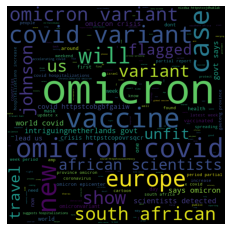

In [19]:
visualize('omicron')

In [20]:
feature_names = vectorizer.get_feature_names()
dense = features.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns=feature_names)

In [21]:
df

,aa,aapl,abeyasingh,abl,abroad,absolut,absurd,abt,acceler,accept,...,xabeffcebebeefbf,xelaphila,year,yearold,yesterday,york,young,youtub,zealand,zero
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
print(vectorizer.idf_)

[6.92759247 7.21527454 6.52212736 ... 6.70444892 7.21527454 6.52212736]


In [23]:
print(vectorizer.vocabulary_)

{'time': 1597, 'let': 939, 'biden': 152, 'way': 1712, 'trump': 1632, 'demvoic': 393, 'onev': 1137, 'resist': 1354, 'omicron': 1132, 'httpstcowqpkzzto': 784, 'httpstcobczesqjgp': 711, 'omarion': 1127, 'pleas': 1214, 'vaxx': 1683, 'boost': 172, 'like': 949, 'post': 1235, 'break': 186, 'report': 1346, 'florida': 570, 'gov': 645, 'ron': 1379, 'desanti': 398, 'slam': 1469, 'world': 1746, 'govern': 646, 'insanity': 854, 'new': 1084, 'covid': 331, 'variant': 1679, 'lock': 963, 'intriguing': 865, 'netherland': 1083, 'govt': 647, 'say': 1403, 'europ': 500, 'south': 1491, 'african': 37, 'scientist': 1411, 'detect': 403, 'flag': 563, 'httpstcobgbfgaiiw': 712, 'confirm': 300, 'case': 225, 'australia': 113, 'austria': 115, 'belgium': 144, 'botswana': 178, 'brazil': 185, 'canada': 215, 'czech': 360, 'republ': 1348, 'denmark': 394, 'germani': 626, 'hong': 697, 'kong': 915, 'israel': 876, 'itali': 879, 'japan': 882, 'portug': 1231, 'africa': 36, 'spain': 1495, 'sweden': 1557, 'switzerland': 1559, 'uk'

In [24]:
 # functions taken from https://kavita-ganesan.com/extracting-keywords-from-text-tfidf/#.YKsxni9h3jA

def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=False)

def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]

    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])

    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results

In [25]:
feature_names = vectorizer.get_feature_names()

sorted_items=sort_coo(features.tocoo())
sorted_items

keywords=extract_topn_from_vector(feature_names,sorted_items,10)

In [26]:
keywords

{'omicron': 0.032}

For some reason the above is only outputting one word. Trying another method below from https://investigate.ai/text-analysis/counting-words-with-scikit-learns-countvectorizer/

In [29]:
# Show us the top 10 most common words
counts = pd.DataFrame(features.toarray(),
                      columns=vectorizer.get_feature_names())

counts.T.sort_values(by=0, ascending=False).head(10)

,0,1,2,3,4,5,6,7,8,9,...,1490,1491,1492,1493,1494,1495,1496,1497,1498,1499
onev,0.368135,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
httpstcowqpkzzto,0.368135,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
httpstcobczesqjgp,0.368135,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
way,0.363305,0.34409,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
demvoic,0.353457,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
resist,0.342072,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
trump,0.245791,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
time,0.239953,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
let,0.229966,0.00000,0.240623,0.0,0.0,0.0,0.0,0.0,0.0,0.150224,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
biden,0.213615,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


There we have it! Top 10 words above-can't make much out of these words besides the fact that the current & previous president's names are in there

In [30]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   username      1500 non-null   object
 1   following     1500 non-null   int64 
 2   followers     1500 non-null   int64 
 3   hashtags      1500 non-null   object
 4   text_clean    1500 non-null   object
 5   length_clean  1500 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 70.4+ KB


In [31]:
# see how many samples we have of each species 
twitter['hashtags'].value_counts()

[]                                                                                                                     1271
['omicron']                                                                                                             110
['omicron', 'covid19']                                                                                                    7
['breaking']                                                                                                              6
['covid19', 'omicron']                                                                                                    6
                                                                                                                       ... 
['disney', 'disneyplusday', 'bitcoin', 'crypto', 'dolar13', 'nft', 'nfts', 'nftgame', 'nftcollector', 'openseanft']       1
['tripswaiver']                                                                                                           1
['nippyk

In [32]:
df.head(10)

,aa,aapl,abeyasingh,abl,abroad,absolut,absurd,abt,acceler,accept,...,xabeffcebebeefbf,xelaphila,year,yearold,yesterday,york,young,youtub,zealand,zero
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
# kmeans model with the optimal number of clusters, x clusters
model = KMeans(n_clusters=10, random_state=42, n_jobs=-1)
model.fit(df)

# gather the predictions
preds= model.predict(df)

In [34]:
# determine the optimal number of clusters 
sum_sq= []

# fit the model for a range of 2 to 30 clusters and add to sum_sq[]
for n in range (2,30):
    print('Calculating for ',n,' clusters')
    
    # random_start makes the results reproducible 
    # n_jobs=-1 means run with all machine processors
    model = KMeans(n_clusters=n, random_state=42, n_jobs=-1)
    model.fit(df)
    sum_sq.append(-model.score(df))

Calculating for  2  clusters
Calculating for  3  clusters
Calculating for  4  clusters
Calculating for  5  clusters
Calculating for  6  clusters
Calculating for  7  clusters
Calculating for  8  clusters
Calculating for  9  clusters
Calculating for  10  clusters
Calculating for  11  clusters
Calculating for  12  clusters
Calculating for  13  clusters
Calculating for  14  clusters
Calculating for  15  clusters
Calculating for  16  clusters
Calculating for  17  clusters
Calculating for  18  clusters
Calculating for  19  clusters
Calculating for  20  clusters
Calculating for  21  clusters
Calculating for  22  clusters
Calculating for  23  clusters
Calculating for  24  clusters
Calculating for  25  clusters
Calculating for  26  clusters
Calculating for  27  clusters
Calculating for  28  clusters
Calculating for  29  clusters


[1410.6775177585712,
 1369.0523418902173,
 1343.0514229399969,
 1317.6367265362585,
 1305.7077627371696,
 1288.1524885230078,
 1244.9737020039877,
 1236.7466819425867,
 1224.1032661020379,
 1218.957717424765,
 1195.5068570409117,
 1180.0105363177804,
 1172.5011611687305,
 1166.259498401063,
 1152.522133979377,
 1149.724389331687,
 1143.1733523900161,
 1131.540607954172,
 1123.8527634381549,
 1117.9017457295595,
 1107.9753952428,
 1105.7812300486821,
 1092.2579350459373,
 1088.7336855014069,
 1083.1519354684249,
 1075.3734684016035,
 1070.3747884215538,
 1064.429157041729]

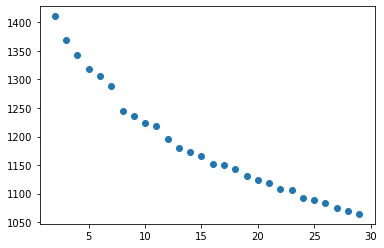

In [35]:
# make our scree plot to visually see the optimal number of clusters

import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(range(2, 30), sum_sq)
np.diff(sum_sq)
sum_sq

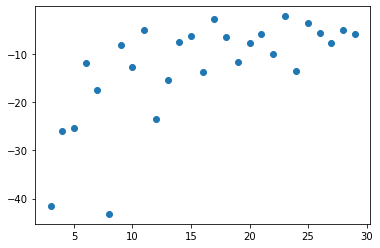

In [36]:
# compare the scree plot with a np.diff() plot

plt.scatter(range(3, 30), np.diff(sum_sq))

By the looks of the two plots above, performance seems to level out a bit at ~15 clusters.

In [37]:
# kmeans model with the optimal number of clusters, 15 clusters
model = KMeans(n_clusters=15, random_state=42, n_jobs=-1)
model.fit(df)

# gather the predictions
preds= model.predict(df)

In [38]:

score = metrics.silhouette_score(df, preds)
score

0.16015014528316687

Eeesh, not a good score...

Text(0.5, 1.0, 'Projection of the clustering on a the axis of the PCA')

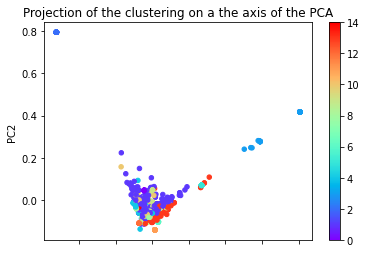

In [39]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data_reduced = pca.fit_transform(df)
data_reduced = pd.DataFrame(data_reduced)

ax = data_reduced.plot(kind='scatter', x=0, y=1, c=preds, cmap='rainbow')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Projection of the clustering on a the axis of the PCA')

Whoa, can't really make heads or tails out of these 15 clusters...

In [40]:
# fit the model for a range of 20 to 50 clusters and add to sum_sq[]
for n in range (20,50):
    # random_start makes the results reproducible 
    # n_jobs=-1 means run with all machine processors
    model = KMeans(n_clusters=n, random_state=42, n_jobs=-1)
    model.fit(X=df)
    # gather the predictions
    preds= model.predict(df)
    score = metrics.silhouette_score(df, preds)
    print('Silhouette score for ',n,' clusters: ',score)

Silhouette score for  20  clusters:  0.18172810656500993
Silhouette score for  21  clusters:  0.18570603776943465
Silhouette score for  22  clusters:  0.19131652506065977
Silhouette score for  23  clusters:  0.19209743888953917
Silhouette score for  24  clusters:  0.19955833731995615
Silhouette score for  25  clusters:  0.20072804282818266
Silhouette score for  26  clusters:  0.20387457004206097
Silhouette score for  27  clusters:  0.20977136019092474
Silhouette score for  28  clusters:  0.21209744422005883
Silhouette score for  29  clusters:  0.2126709278084063
Silhouette score for  30  clusters:  0.21586665908028196
Silhouette score for  31  clusters:  0.21555799787179403
Silhouette score for  32  clusters:  0.21825779574666604
Silhouette score for  33  clusters:  0.22002264656402337
Silhouette score for  34  clusters:  0.22271224630485847
Silhouette score for  35  clusters:  0.22512312126490475
Silhouette score for  36  clusters:  0.22823881426194104
Silhouette score for  37  cluste

Interesting-let's see what things look like with 49 clusters, despite the fact that improvement is marginal:

In [41]:
# kmeans model with the optimal number of clusters, 2 clusters
model = KMeans(n_clusters=49, random_state=42, n_jobs=-1)
model.fit(df)

# gather the predictions
preds= model.predict(df)

from sklearn import metrics
score = metrics.silhouette_score(df, preds)
score

0.25546081893548545

Text(0.5, 1.0, 'Projection of the clustering on a the axis of the PCA')

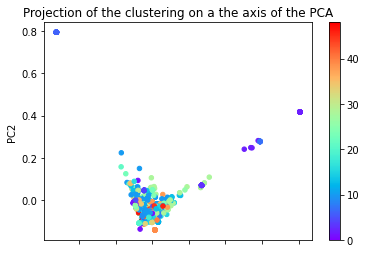

In [42]:
# visualize the clusters
pca = PCA(n_components=49)
data_reduced = pca.fit_transform(df)
data_reduced = pd.DataFrame(data_reduced)

ax = data_reduced.plot(kind='scatter', x=0, y=1, c=preds, cmap='rainbow')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Projection of the clustering on a the axis of the PCA')

Still a lot of overlap...I guess the tweets tied to the hashtag I chose didn't have discernable enough differences to enable a model to have distinct, separate clusters

In [43]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

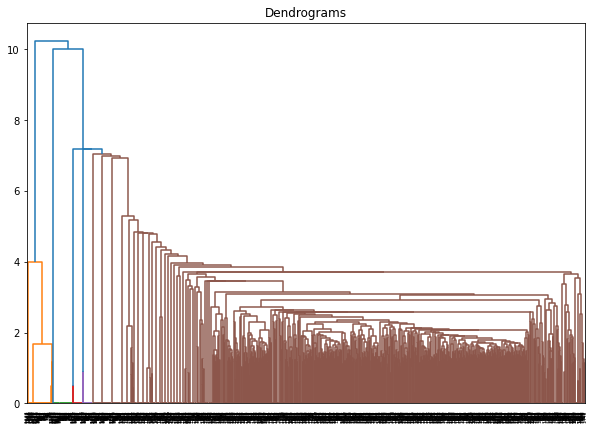

In [44]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df, method='ward'))

Whoa, well this is consistent with what we saw in the kmeans clustering attempts...let's see what happens when a horizontal line is applied:

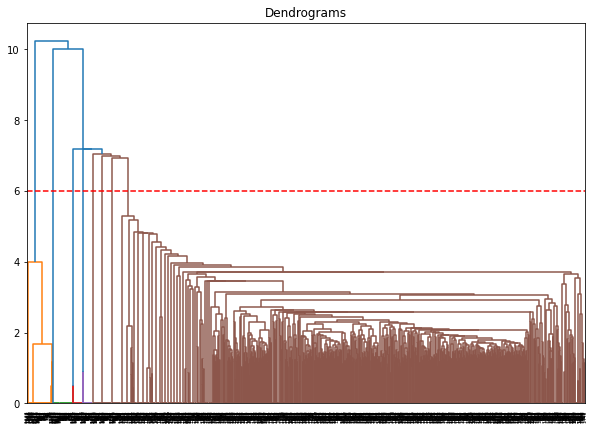

In [45]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')

Per the above, looks like 8 clusters is what is being recommended:

In [46]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=8, affinity='euclidean', linkage='ward')  
cluster.fit_predict(df)

array([0, 5, 0, ..., 0, 1, 0], dtype=int64)

In [47]:
# KMeans clustering a kind of clustering.

number_of_clusters=8
km = KMeans(n_clusters=number_of_clusters)
# Normally people fit the matrix
km.fit(df)
# But you could fit the idf_df instead
km.fit
# It just means "HEY TAKE A LOOK AT AND TRY ON MY TEXT STUFF"

<bound method KMeans.fit of KMeans()>

In [48]:
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(number_of_clusters):
    top_ten_words = [terms[ind] for ind in order_centroids[i, :10]]
    print("Cluster {}: {}".format(i, ' '.join(top_ten_words)))

Top terms per cluster:
Cluster 0: flag scientist europ detect httpstcophhysrzq african world south covid variant
Cluster 1: canada itali confirm hong kong belgium egypt malawi germani ban
Cluster 2: china trump real differ biden virus african south covid variant
Cluster 3: omicron variant covid vaccin like peopl say delta new know
Cluster 4: fight chao speed confus scientif knowledg action beginning sinc way
Cluster 5: omarion post vaxx boost pleas way like omicron variant delta
Cluster 6: vaccin transmit variant protect don travel omicron ban booster fulli
Cluster 7: case variant omicron travel africa countri test south new coronavirus


I thought the above was interesting-provides top 10 most frequent words per cluster